In [1]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv("data_test_technique.csv",sep = ';')
df.head()

,Unnamed: 0,id_individu,mortalite_intra_hosp,complication_intra_hosp,age,ic_atcd,hypertension_atcd,aoc_atcd,aoc_post_hosp,pacemaker_hist,cardio_consultation_hist
0,0,0,1,1,33,0,1,0,0,0,0
1,1,1,1,1,92,0,1,0,0,0,1
2,2,2,1,1,38,1,1,0,0,0,1
3,3,3,1,1,50,1,0,0,0,1,1
4,4,4,1,1,22,0,0,0,0,1,1


In [4]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,id_individu,mortalite_intra_hosp,complication_intra_hosp,age,ic_atcd,hypertension_atcd,aoc_atcd,aoc_post_hosp,pacemaker_hist,cardio_consultation_hist
0,0,1,1,33,0,1,0,0,0,0
1,1,1,1,92,0,1,0,0,0,1
2,2,1,1,38,1,1,0,0,0,1
3,3,1,1,50,1,0,0,0,1,1
4,4,1,1,22,0,0,0,0,1,1


<h1> Combien d’individus sont âgés de plus de 60 ans et présentes un antécédent
d’insuffisance cardiaque ou d’hypertension ?

In [7]:
df_60=(df[df['age']>60])
df_60

,id_individu,mortalite_intra_hosp,complication_intra_hosp,age,ic_atcd,hypertension_atcd,aoc_atcd,aoc_post_hosp,pacemaker_hist,cardio_consultation_hist
1,1,1,1,92,0,1,0,0,0,1
5,5,1,1,97,0,1,0,0,0,1
6,6,1,1,80,1,0,0,0,0,1
7,7,1,1,80,0,0,0,0,1,1
9,9,1,1,97,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9992,9992,0,0,82,1,0,1,1,0,1
9993,9993,0,0,61,0,0,1,1,0,1
9994,9994,0,0,97,0,0,0,1,0,0
9996,9996,0,0,96,1,0,1,0,0,1


In [14]:
rslt_df = df_60[(df_60['ic_atcd'] == 1) |
          df_60['hypertension_atcd'] == 1]
len(rslt_df)

2036

<h1>Quelle est la distribution d’âge des individus de moins de 60 ans ?

<AxesSubplot:>

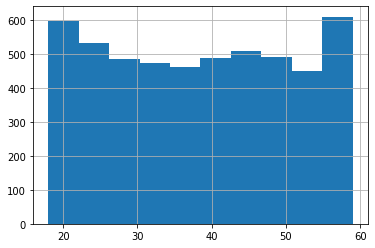

In [25]:
df_moins_60=(df[df['age']<60])
df_moins_60.age.hist()

In [24]:
df_moins_60.age.describe()

count    5099.000000
mean       38.361443
std        12.144472
min        18.000000
25%        28.000000
50%        38.000000
75%        49.000000
max        59.000000
Name: age, dtype: float64

on voit que la distribution d'âge est assez bien répartie dans l'ensemble

<h1>Y-a-t-il une différence statistiquement significative d’avoir un antécédent
d’insuffisance cardiaque entre les individus de plus et de moins de 60 ans ?

In [27]:
print(len(df_60.ic_atcd))
len(df_moins_60.ic_atcd)

4782


5099

Déja en affichant les nombres on voit que la différence entre les deux n'est pas très grande, nous allons désormais faire un test sattistique pour vérifier cela

In [28]:
import scipy.stats as stats

y = stats.ttest_ind(df_60.ic_atcd,df_moins_60.ic_atcd) 
print(y)

Ttest_indResult(statistic=-1.4274104790348372, pvalue=0.15349321918600492)


la p value est de 0.15, il n'y a donc pas de différence significative.

<h1>Y-a-t-il une différence statistiquement significative d’âge entre les individus ayant ou
non un antécédent d’insuffisance cardiaque

In [29]:
df_ic_1 = (df[df['ic_atcd']==1])
df_ic_0 = (df[df['ic_atcd']==0])


In [30]:
y2 = stats.ttest_ind(df_ic_1.age,df_ic_0.age) 
print(y2)

Ttest_indResult(statistic=-1.008854526252359, pvalue=0.3130688211280792)


Il n'y a pas non plus de différence significative

<h3>A l’aide de régressions logistiques univariées et multivariées, quelles variables du set
de données permettent d’expliquer la survenue d’une complication hospitalière ? La
méthodologie à utiliser est la suivante : les variables doivent être sélectionnées sur la
base des résultats des modèles univariés avec une significativité supérieure à 0.2.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV

In [42]:
y = df.complication_intra_hosp
X = df.drop("complication_intra_hosp", axis=1)


In [44]:
# Logistic regression
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(Xs,y)





LogisticRegression(penalty='none', solver='newton-cg')

In [48]:
import numpy as np
pd.DataFrame(np.concatenate([modele_logit.intercept_.reshape(-1,1),
                             modele_logit.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(X.columns)).T

,coef
constante,-1.647566
id_individu,-0.061164
mortalite_intra_hosp,1.277079
age,0.027881
ic_atcd,-0.016532
hypertension_atcd,-0.010239
aoc_atcd,0.007073
aoc_post_hosp,0.037363
pacemaker_hist,0.027891
cardio_consultation_hist,0.003296


In [49]:
import statsmodels.api as sm
x_stat = sm.add_constant(Xs)
# on ajuste le modèle
model = sm.Logit(y, x_stat)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.347018
         Iterations 6


In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     complication_intra_hosp   No. Observations:                10000
Model:                               Logit   Df Residuals:                     9990
Method:                                MLE   Df Model:                            9
Date:                     Thu, 15 Dec 2022   Pseudo R-squ.:                  0.2878
Time:                             12:42:33   Log-Likelihood:                -3470.2
converged:                            True   LL-Null:                       -4872.4
Covariance Type:                 nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6476      0.032    -51.528      0.000      -1.710      -1.585
x1            -0.0612      0.037     -1.642      0.100      -0.134       0.012
x2             1.2771      0.051     24.974      0.000       1.177       1.377
x3             0.0279      0.032      0.873      0.383      -0.035       0.090
x4            -0.0165      0.032     -0.515      0.606      -0.079       0.046
x5            -0.0102      0.033     -0.306      0.760      -0.076       0.055
x6             0.0071      0.035      0.203      0.839      -0.061       0.075
x7             0.0374      0.043      0.866      0.386      -0.047       0.122
x8             0.0279      0.033      0.856      0.392      -0.036       0.092
x9             0.0033      0.032      0.103      0.918      -0.059       0.066
==============================================================================
"""

En utilisant ces deux méthodse les variables sélectionnées sont : age, aoc_post_hosp et pacemaker_hist
    
    

<h3>(Bonus) A l’aide du modèle de Machine Learning de votre choix, décrivez la démarche
que vous auriez adoptée, et les outils python que vous auriez utilisés pour prédire la
mortalité intra hospitalière (décès au cours d’une hospitalisation).

In [53]:
y = df.mortalite_intra_hosp
X = df.drop("mortalite_intra_hosp", axis=1)


In [54]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
from sklearn.model_selection import train_test_split


X_train , X_test, y_train ,y_test = train_test_split(X ,y ,test_size=0.2)
X_train

,id_individu,complication_intra_hosp,age,ic_atcd,hypertension_atcd,aoc_atcd,aoc_post_hosp,pacemaker_hist,cardio_consultation_hist
8267,8267,1,45,0,0,1,1,0,0
1486,1486,0,30,0,0,1,0,0,1
405,405,1,24,1,1,0,0,0,1
3256,3256,0,74,0,0,0,1,0,1
2757,2757,0,68,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
8893,8893,0,62,0,0,1,1,0,1
180,180,1,42,0,0,0,1,0,1
792,792,1,52,1,1,1,0,0,1
3675,3675,0,60,0,0,1,1,0,1


In [59]:
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])
parameters5 = {'rf__n_estimators': [800,900,1000,1100, 1200, 1300]} # defining parameter space
clf5 = GridSearchCV(pipe, parameters5, cv=3)
clf5.fit(X_train, y_train)

print('Returned hyperparameter: {}'.format(clf5.best_params_))
print('Best classification accuracy in train is: {}'.format(clf5.best_score_))
print('Classification accuracy on test is: {}'.format(clf5.score(X_test, y_test)))


Returned hyperparameter: {'rf__n_estimators': 800}
Best classification accuracy in train is: 0.9998750156230471
Classification accuracy on test is: 1.0


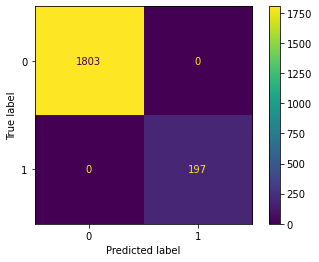

<Figure size 720x720 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf5, X_test, y_test)  
plt.figure(figsize=(10,10))
plt.show()

J'utiliserai le modèle random forest pour ses performances acrrues.
je commencerai par diviser le jeu de données en données d'apprentissage et données de test
puis à l'aide d'une pipeline je cominerai les opérations de centrer et réduire les données afin d'avoir la même échelle et le lancement de l'algorithme, ce lancement sera fait en validation croisé en testant différents paramètres ici qu'un seul pour l'instant et le resultat de cette validation croisée serait le resultat optimal.
ici on voit que l'accuracy est de 1 ce qui est un peu bizarre, on peut se demander si alors le jeu de données n'est pas déséquilibré, ce qui est en effet le cas et on le voit quand on affiche la matrice de confusion, mais ce qui est surprenant c'est que malgré ce déséquilibre on voit que tout a été bien prédit sans erreur